In [18]:
library(dplyr)
library(forecast)

In [92]:
data = read.csv('travel_data.tsv', sep='\t')
head(data)

ga.pagePath,ga.date,ga.sessions
www.travelocity.com/flights-search,20170104,364537
www.travelocity.com/flights-search,20170105,332169
www.travelocity.com/flights-search,20161206,272280
www.travelocity.com/,20170103,268885
www.travelocity.com/flights-search,20170102,267440
www.travelocity.com/,20170104,266256


In [93]:
root = data[data$ga.pagePath == 'www.travelocity.com/', ]
head(root)

,ga.pagePath,ga.date,ga.sessions
4,www.travelocity.com/,20170103,268885
6,www.travelocity.com/,20170104,266256
8,www.travelocity.com/,20170105,250454
13,www.travelocity.com/,20161205,213344
14,www.travelocity.com/,20161206,211459
18,www.travelocity.com/,20161201,191696


In [94]:
as.Date('20170103', format='%Y%m%d')
typeof(root$ga.date[2])
as.Date(toString(root$ga.date[2]), format='%Y%m%d')

[1] "2017-01-03"

[1] "integer"

[1] "2017-01-04"

In [95]:
root$ga.date = as.character(root$ga.date)
head(root)

,ga.pagePath,ga.date,ga.sessions
4,www.travelocity.com/,20170103,268885
6,www.travelocity.com/,20170104,266256
8,www.travelocity.com/,20170105,250454
13,www.travelocity.com/,20161205,213344
14,www.travelocity.com/,20161206,211459
18,www.travelocity.com/,20161201,191696


In [96]:
root$ga.date = as.Date(root$ga.date, format='%Y%m%d')
head(root)

,ga.pagePath,ga.date,ga.sessions
4,www.travelocity.com/,2017-01-03,268885
6,www.travelocity.com/,2017-01-04,266256
8,www.travelocity.com/,2017-01-05,250454
13,www.travelocity.com/,2016-12-05,213344
14,www.travelocity.com/,2016-12-06,211459
18,www.travelocity.com/,2016-12-01,191696


In [101]:
root = root[order(root$ga.date),]
root$ga.pagePath = NULL
head(root)

,ga.date,ga.sessions
18,2016-12-01,191696
29,2016-12-02,170833
37,2016-12-03,139675
27,2016-12-04,177041
13,2016-12-05,213344
14,2016-12-06,211459


In [106]:
rownames(root) = root$ga.date
root$ga.date = NULL
head(root)

,ga.sessions
2016-12-01,191696
2016-12-02,170833
2016-12-03,139675
2016-12-04,177041
2016-12-05,213344
2016-12-06,211459


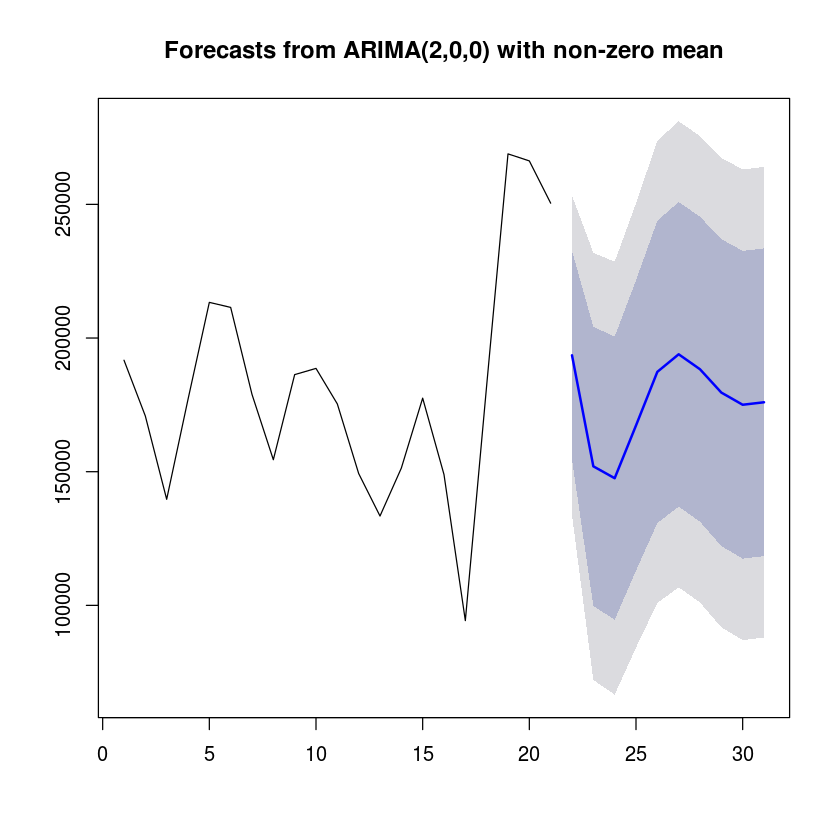

In [113]:
model = auto.arima(root)
plot(forecast(model))

In [114]:
model

Series: root 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2   intercept
      0.8882  -0.5701  180211.596
s.e.  0.1785   0.1906    9331.881

sigma^2 estimated as 929158670:  log likelihood=-245.59
AIC=499.18   AICc=501.68   BIC=503.35

In [108]:
attach(sess)
sess = sess[order(ga.date),]
rownames(sess) = ga.date
sess$ga.pagePath = NULL
sess$ga.date = NULL
head(sess)

The following objects are masked from sess (pos = 3):

    ga.date, ga.sessions

The following objects are masked from sess (pos = 4):

    ga.date, ga.sessions

The following objects are masked from sess (pos = 5):

    ga.date, ga.sessions

The following objects are masked from sess (pos = 6):

    ga.date, ga.sessions

The following objects are masked from sess (pos = 7):

    ga.date, ga.sessions

The following objects are masked from sess (pos = 8):

    ga.date, ga.sessions

The following objects are masked from sess (pos = 9):

    ga.date, ga.sessions



,ga.sessions
20161201,191696
20161202,170833
20161203,139675
20161204,177041
20161205,213344
20161206,211459


In [119]:
ga.sessions

[1] 191696 170833 139675 177041 213344 211459 178916 154482 186320 188642
[11] 175344 149314 133416 151347 177518 148920  94296 182264 268885 266256
[21] 250454

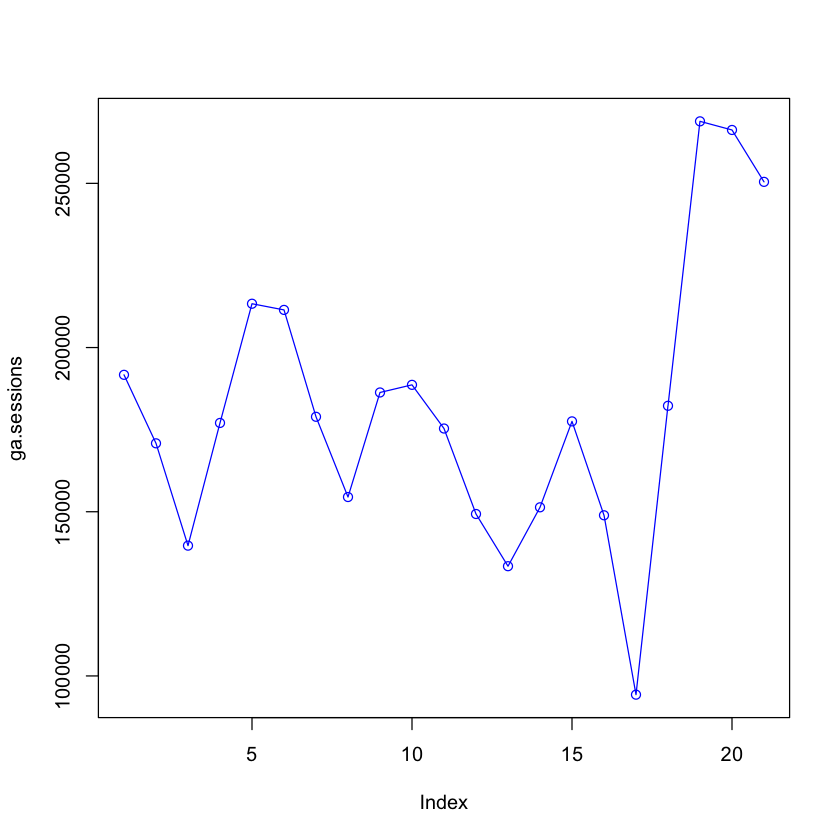

In [122]:
plot(ga.sessions, type='o', col='blue')

In [129]:
auto.arima(ga.sessions, stationary=FALSE, seasonal=TRUE)

Series: ga.sessions 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2   intercept
      0.8882  -0.5701  180211.596
s.e.  0.1785   0.1906    9331.881

sigma^2 estimated as 929158670:  log likelihood=-245.59
AIC=499.18   AICc=501.68   BIC=503.35

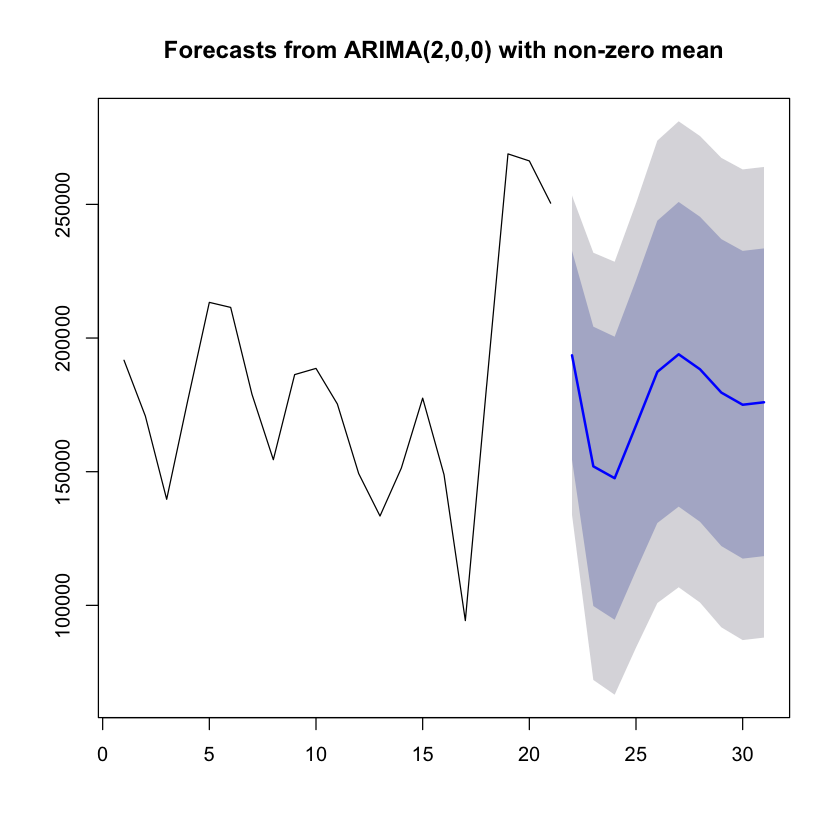

In [130]:
mod = Arima(ga.sessions, order=c(2, 0, 0))
plot(forecast(mod))

In [10]:
df = data.frame(data)

In [31]:
df['ga.pagePath']

ga.pagePath
www.travelocity.com/flights-search
www.travelocity.com/flights-search
www.travelocity.com/flights-search
www.travelocity.com/
www.travelocity.com/flights-search
www.travelocity.com/
www.travelocity.com/flights-search
www.travelocity.com/
www.travelocity.com/flights-search
www.travelocity.com/flights-search
